In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [107]:
data = pd.read_csv("/kaggle/input/our-world-in-data-covid19-dataset/owid-covid-data.csv")
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350080,ZWE,Africa,Zimbabwe,2023-10-14,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350081,ZWE,Africa,Zimbabwe,2023-10-15,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350082,ZWE,Africa,Zimbabwe,2023-10-16,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350083,ZWE,Africa,Zimbabwe,2023-10-17,265808.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,312088.0,6.683354e+06,4.068903e+07,1.0000,8090.000000,7.020500e+04,7.409558e+05,7.714071e+08
new_cases,340457.0,9.601634e+03,1.102769e+05,0.0000,0.000000,2.000000e+00,2.640000e+02,8.401961e+06
new_cases_smoothed,339198.0,9.637066e+03,9.447784e+04,0.0000,0.286000,2.485700e+01,4.978570e+02,6.402036e+06
total_deaths,290501.0,8.602180e+04,4.398873e+05,1.0000,127.000000,1.328000e+03,1.192200e+04,6.972139e+06
new_deaths,340511.0,8.551106e+01,6.136880e+02,0.0000,0.000000,0.000000e+00,3.000000e+00,2.793900e+04
...,...,...,...,...,...,...,...,...
population,350085.0,1.284633e+08,6.607694e+08,47.0000,449002.000000,5.882259e+06,2.830170e+07,7.975105e+09
excess_mortality_cumulative_absolute,12184.0,5.281637e+04,1.492195e+05,-37726.0980,120.225025,5.885850e+03,3.742344e+04,1.289776e+06
excess_mortality_cumulative,12184.0,9.738648e+00,1.230444e+01,-44.2300,1.400000,8.075000e+00,1.536000e+01,7.662000e+01
excess_mortality,12184.0,1.134526e+01,2.518130e+01,-95.9200,-1.600000,5.720000e+00,1.630250e+01,3.776300e+02


In [4]:
pd.options.display.max_rows = 100
nanDiscibe = data.isna().sum()
nanDiscibe

iso_code                                           0
continent                                      16665
location                                           0
date                                               0
total_cases                                    37997
new_cases                                       9628
new_cases_smoothed                             10887
total_deaths                                   59584
new_deaths                                      9574
new_deaths_smoothed                            10804
total_cases_per_million                        37997
new_cases_per_million                           9628
new_cases_smoothed_per_million                 10887
total_deaths_per_million                       59584
new_deaths_per_million                          9574
new_deaths_smoothed_per_million                10804
reproduction_rate                             165268
icu_patients                                  312470
icu_patients_per_million                      

In [5]:
maxLine = len(data)
tempData = data
for column in data:
    if ((data[column].isna().sum()/maxLine) * 100) >= 80:
        tempData = tempData.drop([column] ,axis = 1)
        print(column)
        
tempData

icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_boosters
new_vaccinations
total_boosters_per_hundred
excess_mortality_cumulative_absolute
excess_mortality_cumulative
excess_mortality
excess_mortality_cumulative_per_million


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350080,ZWE,Africa,Zimbabwe,2023-10-14,265808.0,0.0,5.286,5718.0,0.0,0.0,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0
350081,ZWE,Africa,Zimbabwe,2023-10-15,265808.0,0.0,5.286,5718.0,0.0,0.0,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0
350082,ZWE,Africa,Zimbabwe,2023-10-16,265808.0,0.0,5.286,5718.0,0.0,0.0,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0
350083,ZWE,Africa,Zimbabwe,2023-10-17,265808.0,0.0,0.000,5718.0,0.0,0.0,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0


In [6]:
 tempData.isna().sum()

iso_code                                           0
continent                                      16665
location                                           0
date                                               0
total_cases                                    37997
new_cases                                       9628
new_cases_smoothed                             10887
total_deaths                                   59584
new_deaths                                      9574
new_deaths_smoothed                            10804
total_cases_per_million                        37997
new_cases_per_million                           9628
new_cases_smoothed_per_million                 10887
total_deaths_per_million                       59584
new_deaths_per_million                          9574
new_deaths_smoothed_per_million                10804
reproduction_rate                             165268
total_tests                                   270698
new_tests                                     

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   333420 non-null  object 
 2   location                                    350085 non-null  object 
 3   date                                        350085 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

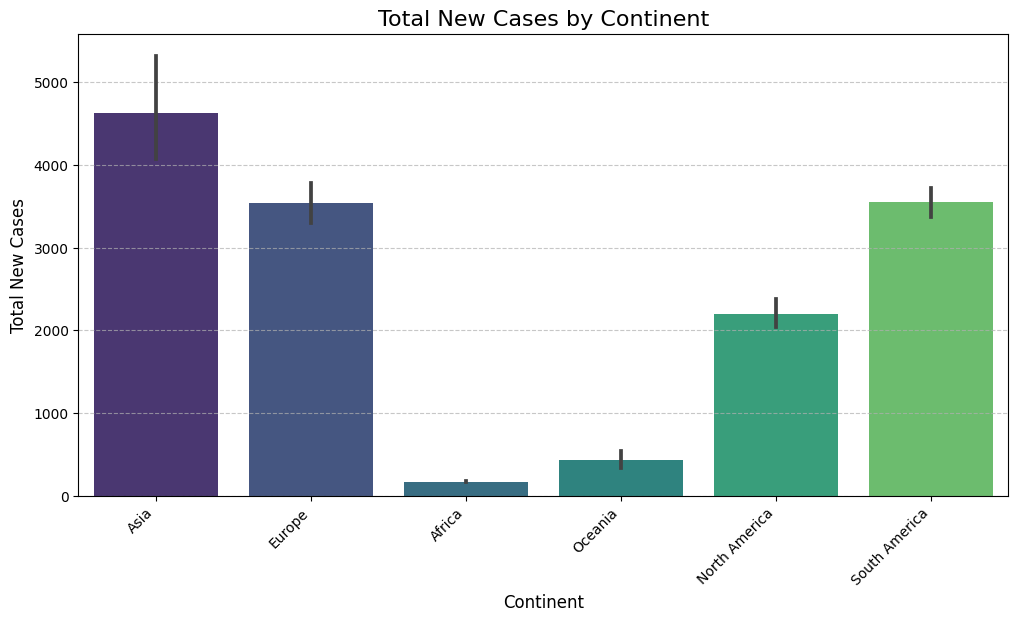

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for better visual appeal
custom_palette = sns.color_palette("viridis", n_colors=len(data['continent'].unique()))

# Use seaborn for better aesthetics
plt.figure(figsize=(12, 6))
sns.barplot(x='continent', y='new_cases', data=data, palette=custom_palette)

# Customize labels and title
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Total New Cases', fontsize=12)
plt.title('Total New Cases by Continent', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


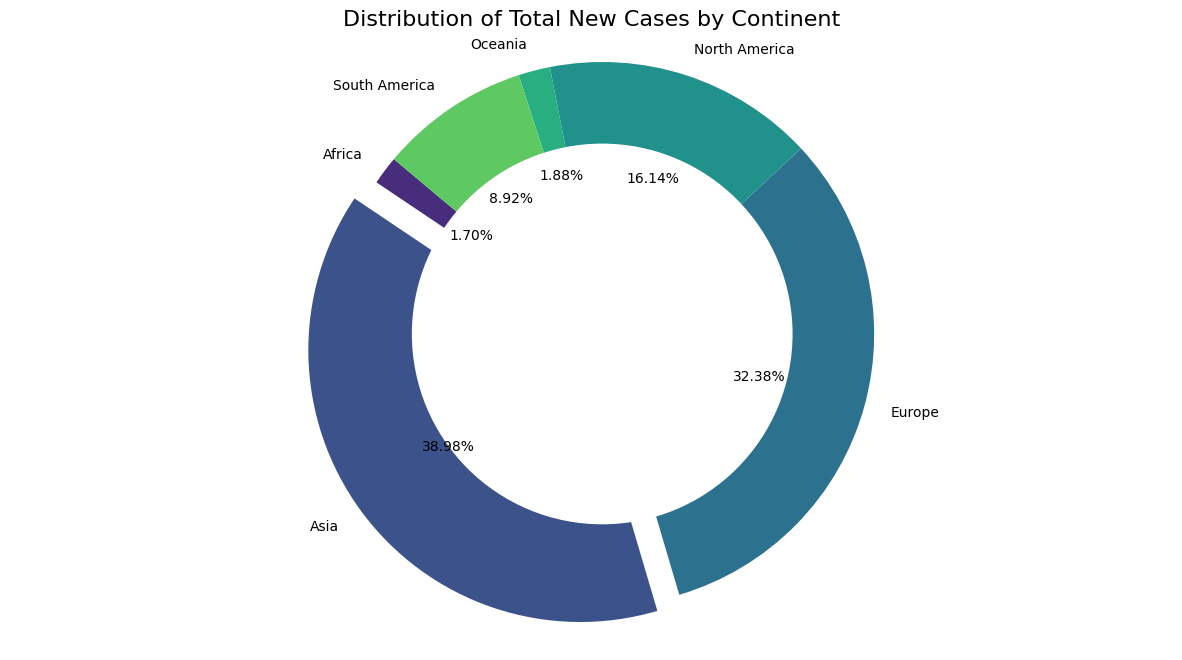

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for better visual appeal
custom_palette = sns.color_palette("viridis", n_colors=len(data['continent'].unique()))

# Set explode values
explode = (0, 0.1, 0, 0, 0, 0)

# Use seaborn for better aesthetics
plt.figure(figsize=(15, 8))

# Get the total new cases for each continent
total_new_cases = data.groupby(['continent'])['new_cases'].sum()

# Ensure the lengths of labels and data match
plt.pie(total_new_cases, labels=total_new_cases.index, autopct='%.2f%%', colors=custom_palette, explode=explode, startangle=140)

# Customize title
plt.title('Distribution of Total New Cases by Continent', fontsize=16)

# Add a circle in the middle to transform it into a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


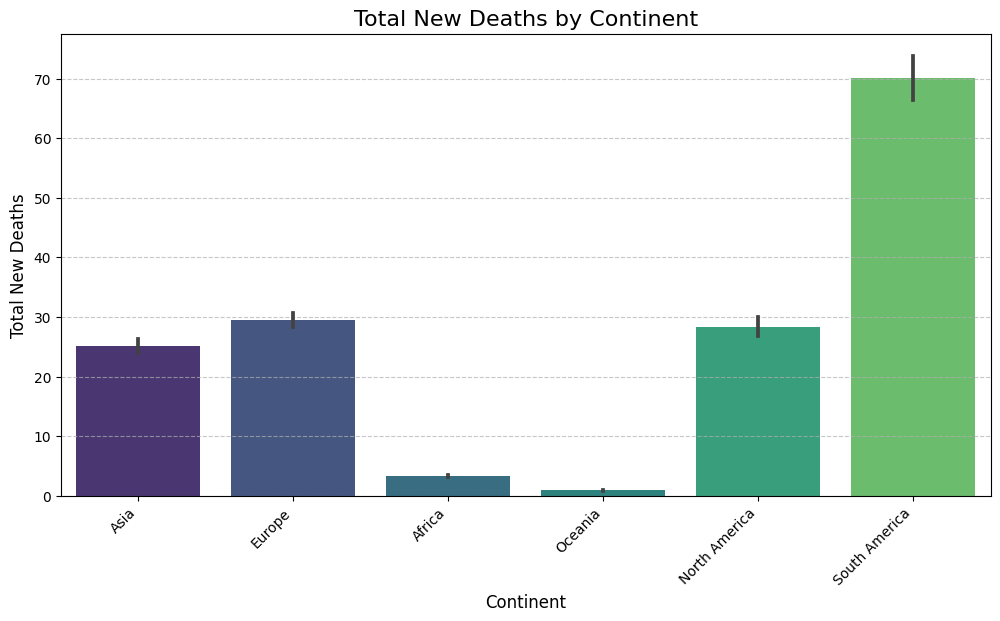

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for better visual appeal
custom_palette = sns.color_palette("viridis", n_colors=len(data['continent'].unique()))

# Use seaborn for better aesthetics
plt.figure(figsize=(12, 6))
sns.barplot(x='continent', y='new_deaths', data=data, palette=custom_palette)

# Customize labels and title
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Total New Deaths', fontsize=12)
plt.title('Total New Deaths by Continent', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


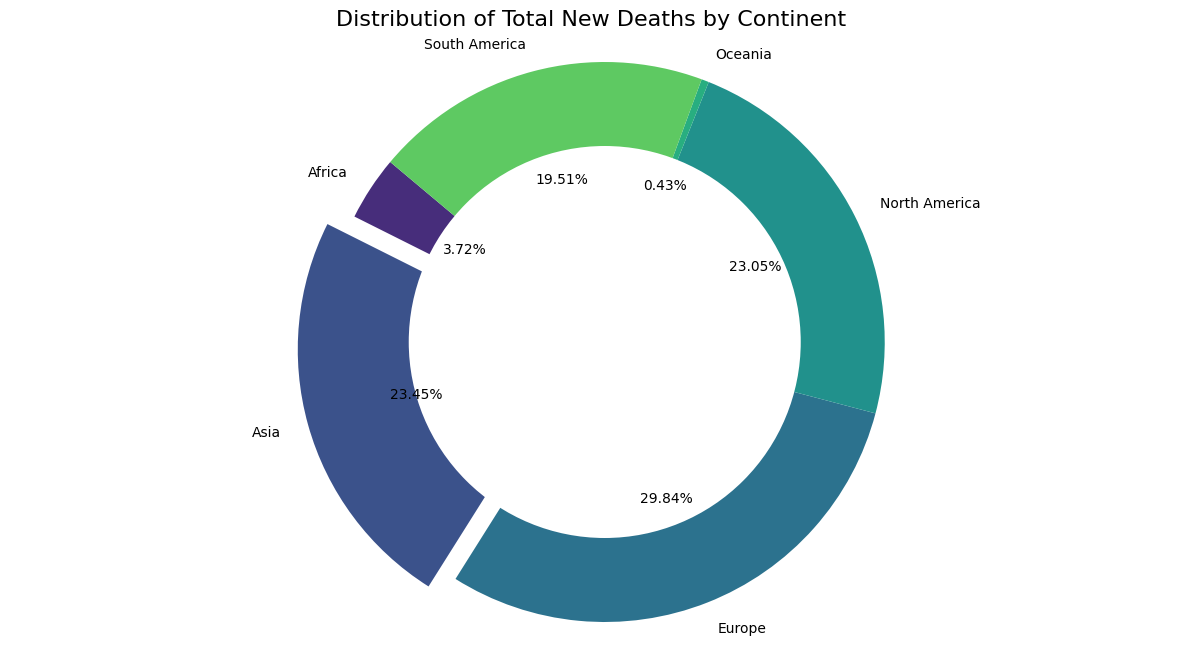

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for better visual appeal
custom_palette = sns.color_palette("viridis", n_colors=len(data['continent'].unique()))

# Set explode values
explode = (0, 0.1, 0, 0, 0, 0)

# Use seaborn for better aesthetics
plt.figure(figsize=(15, 8))

# Get the total new cases for each continent
total_new_cases = data.groupby(['continent'])['new_deaths'].sum()

# Ensure the lengths of labels and data match
plt.pie(total_new_cases, labels=total_new_cases.index, autopct='%.2f%%', colors=custom_palette, explode=explode, startangle=140)

# Customize title
plt.title('Distribution of Total New Deaths by Continent', fontsize=16)

# Add a circle in the middle to transform it into a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


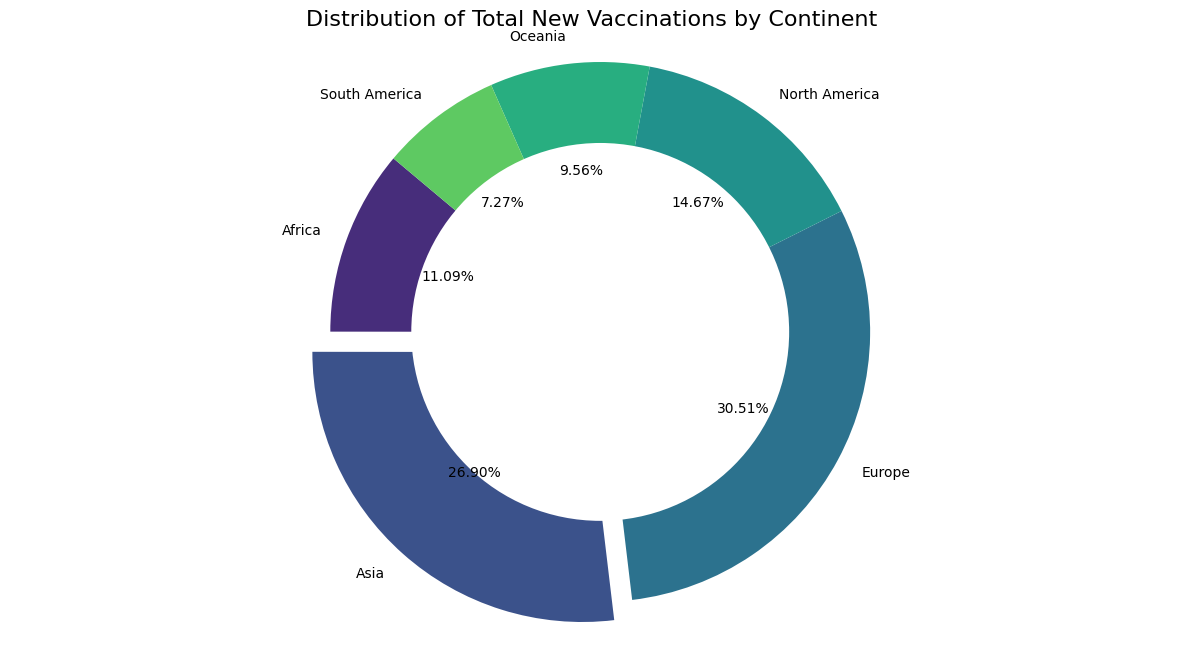

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for better visual appeal
custom_palette = sns.color_palette("viridis", n_colors=len(data['continent'].unique()))

# Set explode values
explode = (0, 0.1, 0, 0, 0, 0)

# Use seaborn for better aesthetics
plt.figure(figsize=(15, 8))

# Get the total new cases for each continent
total_new_cases = data.groupby(['continent'])['new_vaccinations_smoothed_per_million'].sum()

# Ensure the lengths of labels and data match
plt.pie(total_new_cases, labels=total_new_cases.index, autopct='%.2f%%', colors=custom_palette, explode=explode, startangle=140)

# Customize title
plt.title('Distribution of Total New Vaccinations by Continent', fontsize=16)

# Add a circle in the middle to transform it into a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


/tmp/ipykernel_48/2042747265.py:12: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(x='date', y='total_cases_per_million', hue='continent', data=data.reset_index(), ax=ax1, palette=custom_palette, style='continent', markers=True, dashes=False)
/tmp/ipykernel_48/2042747265.py:20: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(x='date', y='total_deaths_per_million', hue='continent', data=data.reset_index(), ax=ax2, palette=custom_palette, style='continent', markers=True, dashes=False)


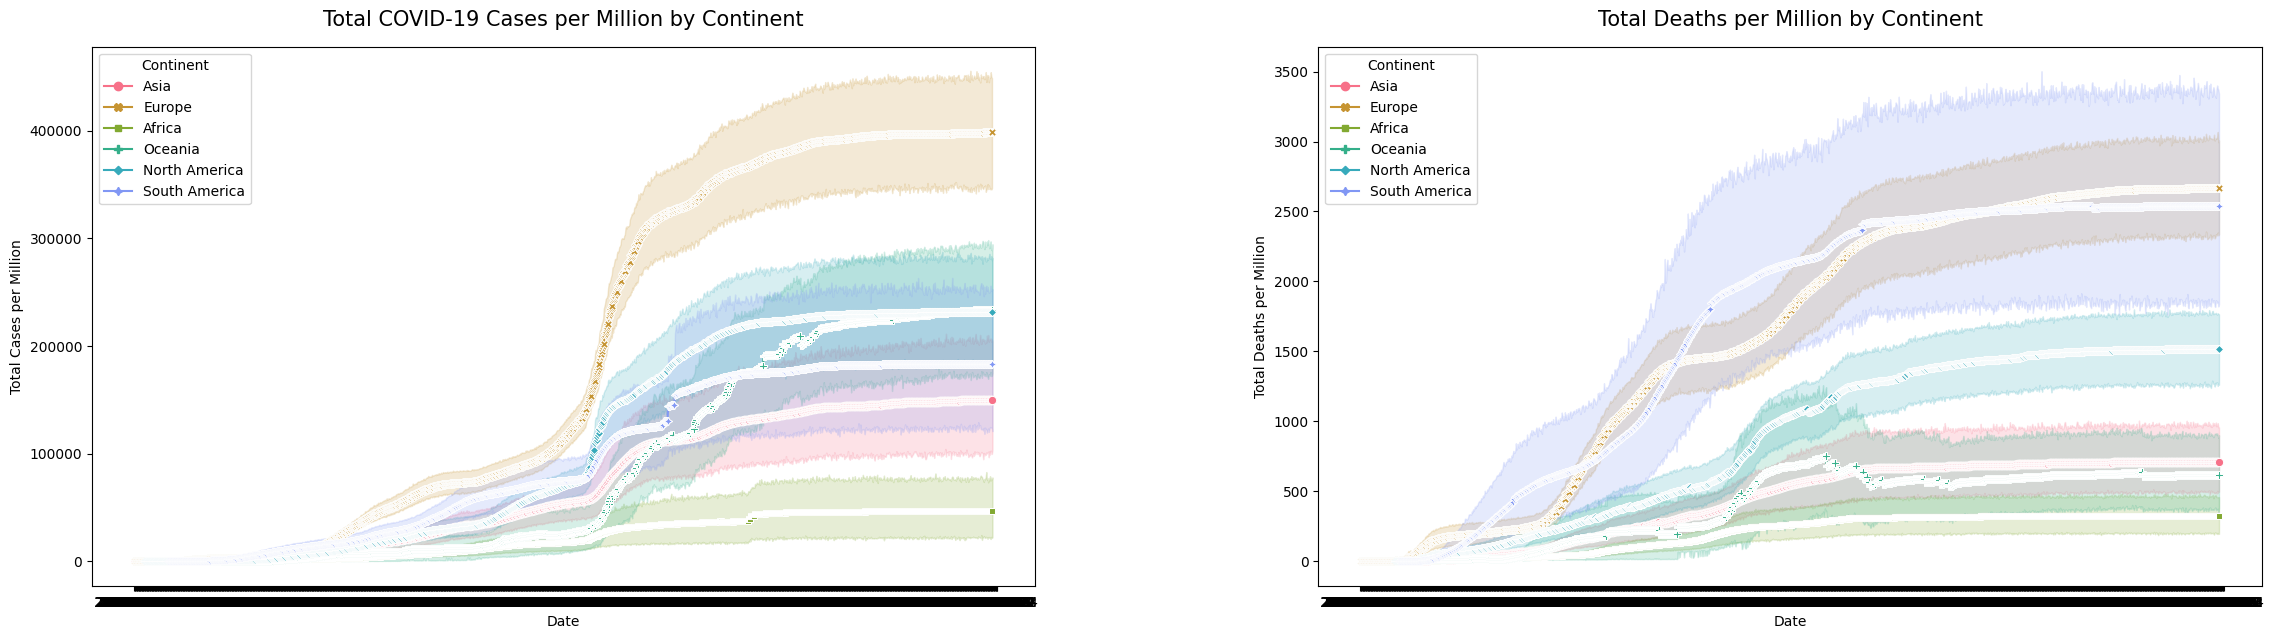

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for better visual appeal
custom_palette = sns.color_palette("husl", n_colors=len(data['continent'].unique()))

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 7))
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots

# Plot Total COVID-19 cases per million by continent
sns.lineplot(x='date', y='total_cases_per_million', hue='continent', data=data.reset_index(), ax=ax1, palette=custom_palette, style='continent', markers=True, dashes=False)

# Customize the first subplot
ax1.set(xlabel="Date", ylabel="Total Cases per Million")
ax1.set_title("Total COVID-19 Cases per Million by Continent", fontsize=15, pad=15)
ax1.legend(title='Continent', loc='upper left')

# Plot Total deaths per million by continent
sns.lineplot(x='date', y='total_deaths_per_million', hue='continent', data=data.reset_index(), ax=ax2, palette=custom_palette, style='continent', markers=True, dashes=False)

# Customize the second subplot
ax2.set(xlabel="Date", ylabel="Total Deaths per Million")
ax2.set_title("Total Deaths per Million by Continent", fontsize=15, pad=15)
ax2.legend(title='Continent', loc='upper left')

# Show the plot
plt.show()



In [16]:
data['date'] = pd.to_datetime(data['date'])
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 
temp = data.groupby('date')[['new_deaths','new_cases_per_million']].sum().reset_index()
temp = temp.melt(id_vars="date", value_vars=['new_deaths', 'new_cases_per_million'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="date", y="Count", color='Case', height=600, width=700,
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [17]:
tempData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 52 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   333420 non-null  object 
 2   location                                    350085 non-null  object 
 3   date                                        350085 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

In [9]:
data['date'] = pd.to_datetime(data['date'])
data["date"]

0        2020-01-03
1        2020-01-04
2        2020-01-05
3        2020-01-06
4        2020-01-07
            ...    
350080   2023-10-14
350081   2023-10-15
350082   2023-10-16
350083   2023-10-17
350084   2023-10-18
Name: date, Length: 350085, dtype: datetime64[ns]

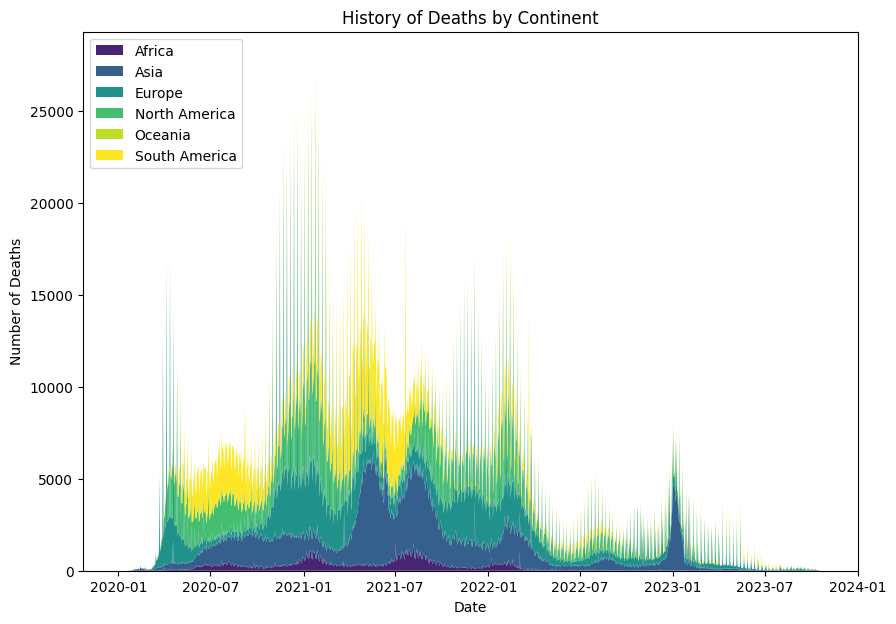

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data is your DataFrame with columns: date, continent, deaths

# Pivot the data to have each continent's history as a separate series
pivot_data = data.pivot_table(index='date', columns='continent', values='new_deaths', aggfunc='sum', fill_value=0)


# Define COLORS
COLORS = plt.cm.viridis([0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
#["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#02e3df" ,"#5711ac"]

# Create a stackplot
fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(pivot_data.index, pivot_data.values.T, colors=COLORS, baseline="zero");

# Customize labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax.set_title('History of Deaths by Continent')

# Add legend
ax.legend(pivot_data.columns, loc='upper left')

# Show the plot
plt.show()


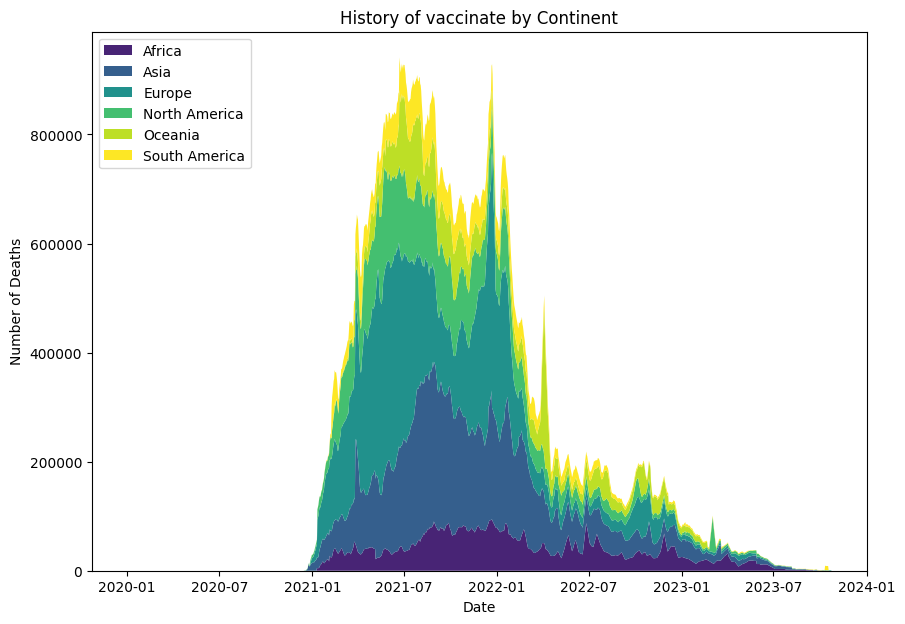

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data is your DataFrame with columns: date, continent, deaths

# Pivot the data to have each continent's history as a separate series
pivot_data = data.pivot_table(index='date', columns='continent', values='new_vaccinations_smoothed_per_million', aggfunc='sum', fill_value=0)


# Define COLORS
COLORS = plt.cm.viridis([0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
#["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#02e3df" ,"#5711ac"]

# Create a stackplot
fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(pivot_data.index, pivot_data.values.T, colors=COLORS, baseline="zero");

# Customize labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax.set_title('History of vaccinate by Continent')

# Add legend
ax.legend(pivot_data.columns, loc='upper left')

# Show the plot
plt.show()


In [68]:
continent_stats["life_expectancy"].values

array([64.95883908, 74.51733094, 79.77922396, 77.21058891, 73.65552455,
       75.89214948])

In [103]:
from sklearn.preprocessing import StandardScaler

continent_stats = data.groupby('continent').agg({
    'life_expectancy': 'mean',
    'gdp_per_capita': 'mean',
    'new_deaths' : "mean",
    'population_density' : "mean",
    'hospital_beds_per_thousand' : "mean",
    'people_fully_vaccinated' : "mean"
    
}).reset_index()


scaler = StandardScaler()

continent_stats["life_expectancy"] = scaler.fit_transform(continent_stats["life_expectancy"].values.reshape(-1, 1))
continent_stats["gdp_per_capita"] = scaler.fit_transform(continent_stats["gdp_per_capita"].values.reshape(-1, 1))
continent_stats["new_deaths"] = scaler.fit_transform(continent_stats["new_deaths"].values.reshape(-1, 1))
continent_stats["population_density"] = scaler.fit_transform(continent_stats["population_density"].values.reshape(-1, 1))
continent_stats["hospital_beds_per_thousand"] = scaler.fit_transform(continent_stats["hospital_beds_per_thousand"].values.reshape(-1, 1))
continent_stats["people_fully_vaccinated"] = scaler.fit_transform(continent_stats["people_fully_vaccinated"].values.reshape(-1, 1))


continent_stats

,continent,life_expectancy,gdp_per_capita,new_deaths,population_density,hospital_beds_per_thousand,people_fully_vaccinated
0,Africa,-2.024282,-1.371869,-1.006593,-0.795100,-1.177596,-0.876542
1,Asia,0.039231,0.611917,-0.048294,1.651467,0.298302,2.032912
2,Europe,1.175182,1.650485,0.142261,1.028790,1.947273,-0.534063
3,North America,0.620658,0.383416,0.094731,-0.179482,-0.485018,0.164059
4,Oceania,-0.146819,-0.811547,-1.111044,-0.634675,0.113025,-0.881864
5,South America,0.336030,-0.462402,1.928939,-1.070999,-0.695985,0.095497


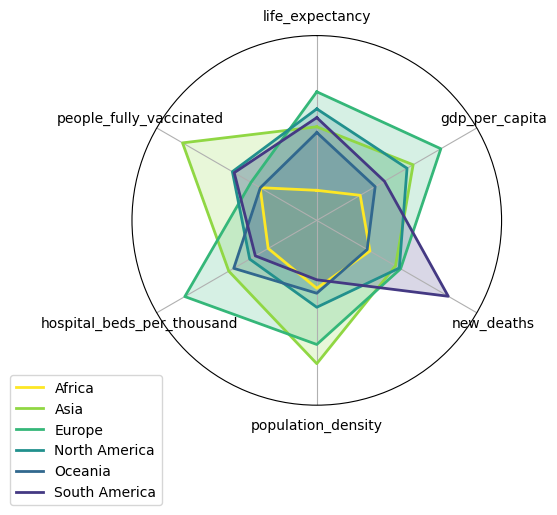

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from matplotlib.colors import ListedColormap

# Set data
df = continent_stats

# Number of variables
categories = list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (divide the plot by the number of variables)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(subplot_kw=dict(polar=True))

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30], ["10", "20", "30"], color="grey", size=7)
plt.ylim(-3, 3)

# Create a colormap for lines and fill areas
colors = plt.cm.viridis_r(df.index / len(df))
custom_cmap = ListedColormap(colors)

# Plot each continent
for i in range(len(df)):
    values = df.loc[i].drop('continent').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df["continent"][i], color=colors[i])
    ax.fill(angles, values, alpha=0.2, color=colors[i])

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()


In [135]:
filtered_data = data[data['location'] != 'World']

# Find the index of the row with the maximum 'total_deaths' for each continent
idx_max_deaths = filtered_data.groupby('continent')['total_deaths'].idxmax()

# Create a new DataFrame with the countries having the most deaths for each continent
countries_most_deaths_by_continent = filtered_data.loc[idx_max_deaths, ['continent', 'location', 'total_deaths']]
countries_most_deaths_by_continent

,continent,location,total_deaths
290457,Africa,South Africa,102595.0
141152,Asia,India,532037.0
257558,Europe,Russia,400102.0
330850,North America,United States,1136920.0
19389,Oceania,Australia,23188.0
42871,South America,Brazil,704659.0


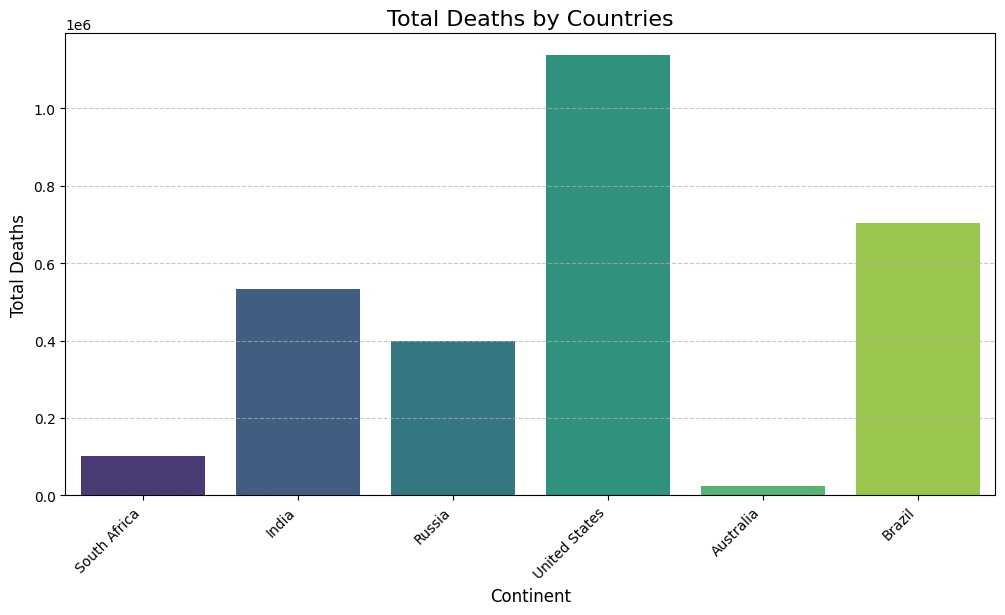

In [136]:
custom_palette = sns.color_palette("viridis", n_colors=len(countries_most_deaths_by_continent['location'].unique()))

# Use seaborn for better aesthetics
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='total_deaths', data=countries_most_deaths_by_continent, palette=custom_palette)

# Customize labels and title
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.title('Total Deaths by Countries', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [146]:
selected_countries = ['Russia', 'Brazil', 'United States', 'South Africa', 'India', 'Australia', 'Iran']
filtered_data = data[data['location'].isin(selected_countries)]
filtered_data["total_deaths"] = filtered_data["total_deaths"].dropna()
filtered_data

/tmp/ipykernel_47/3947692738.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
18020,AUS,Oceania,Australia,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN
18021,AUS,Oceania,Australia,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN
18022,AUS,Oceania,Australia,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410.0,-42.7,-1.44,-1.44,-1.663417
18023,AUS,Oceania,Australia,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN
18024,AUS,Oceania,Australia,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330861,USA,North America,United States,2023-10-14,103436829.0,NaN,NaN,1136920.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
330862,USA,North America,United States,2023-10-15,103436829.0,NaN,NaN,1136920.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
330863,USA,North America,United States,2023-10-16,103436829.0,NaN,NaN,1136920.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
330864,USA,North America,United States,2023-10-17,103436829.0,NaN,NaN,1136920.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


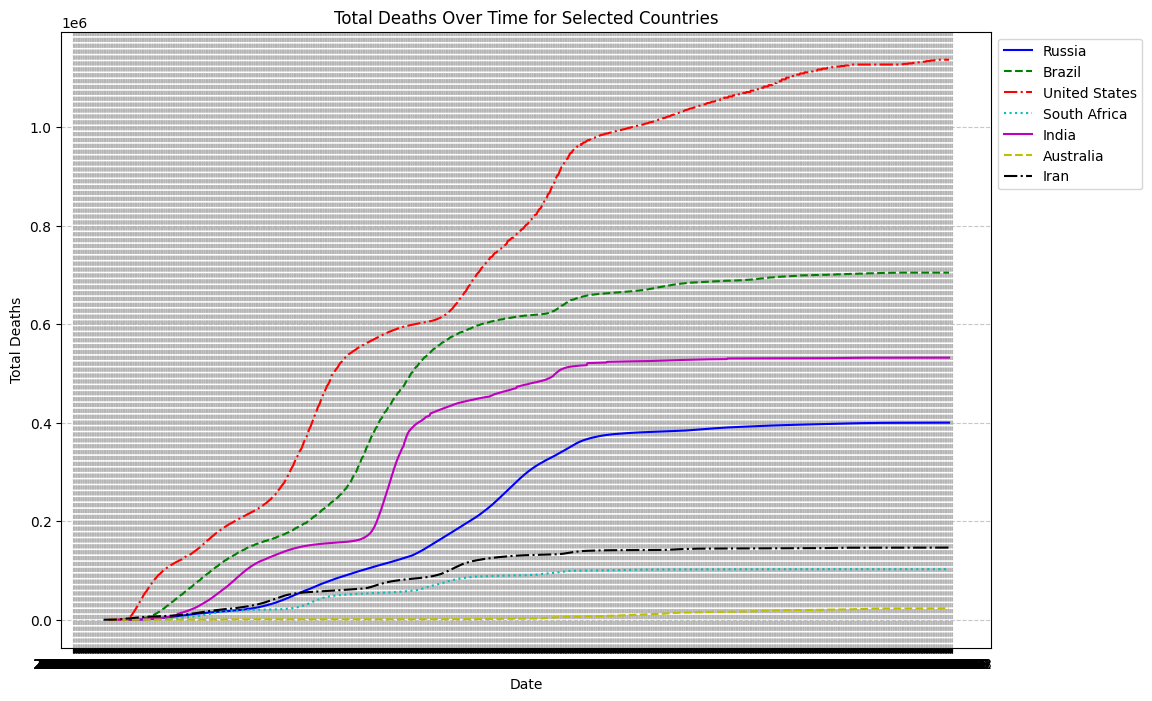

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'filtered_data'
selected_countries = ['Russia', 'Brazil', 'United States', 'South Africa', 'India', 'Australia', 'Iran']
countries_data = filtered_data[filtered_data["location"].isin(selected_countries)]

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plotting for each country with different line styles and colors
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, country in enumerate(selected_countries):
    country_data = countries_data[countries_data["location"] == country]
    plt.plot(country_data["date"], country_data["total_deaths"], label=country, linestyle=line_styles[i], color=colors[i])

# Adding labels and title
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.title("Total Deaths Over Time for Selected Countries")

# Adding legend with more space
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Beautify the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the graph
plt.show()


In [158]:
from sklearn.preprocessing import StandardScaler

continent_stats = filtered_data.groupby('location').agg({
    'life_expectancy': 'mean',
    'gdp_per_capita': 'mean',
    'total_deaths' : "mean",
    'population_density' : "mean",
    'hospital_beds_per_thousand' : "mean",
    'people_fully_vaccinated' : "mean"
    
}).reset_index()


scaler = StandardScaler()

continent_stats["life_expectancy"] = scaler.fit_transform(continent_stats["life_expectancy"].values.reshape(-1, 1))
continent_stats["gdp_per_capita"] = scaler.fit_transform(continent_stats["gdp_per_capita"].values.reshape(-1, 1))
continent_stats["total_deaths"] = scaler.fit_transform(continent_stats["total_deaths"].values.reshape(-1, 1))
continent_stats["population_density"] = scaler.fit_transform(continent_stats["population_density"].values.reshape(-1, 1))
continent_stats["hospital_beds_per_thousand"] = scaler.fit_transform(continent_stats["hospital_beds_per_thousand"].values.reshape(-1, 1))
continent_stats["people_fully_vaccinated"] = scaler.fit_transform(continent_stats["people_fully_vaccinated"].values.reshape(-1, 1))


continent_stats

,location,life_expectancy,gdp_per_capita,total_deaths,population_density,hospital_beds_per_thousand,people_fully_vaccinated
0,Australia,1.532654,1.187773,-1.163159,-0.573998,0.358634,-0.657170
1,Brazil,0.242152,-0.666084,0.857427,-0.427087,-0.367489,-0.195321
2,India,-0.819610,-1.132004,0.338135,2.434579,-1.106895,2.366921
3,Iran,0.378713,-0.363887,-0.780828,-0.260309,-0.677419,-0.499714
4,Russia,-0.321162,-0.018954,-0.188052,-0.536184,2.222644,-0.495144
5,South Africa,-1.763588,-0.775850,-0.894479,-0.281009,-0.314358,-0.645663
6,United States,0.750842,1.769005,1.830955,-0.355992,-0.115117,0.126090


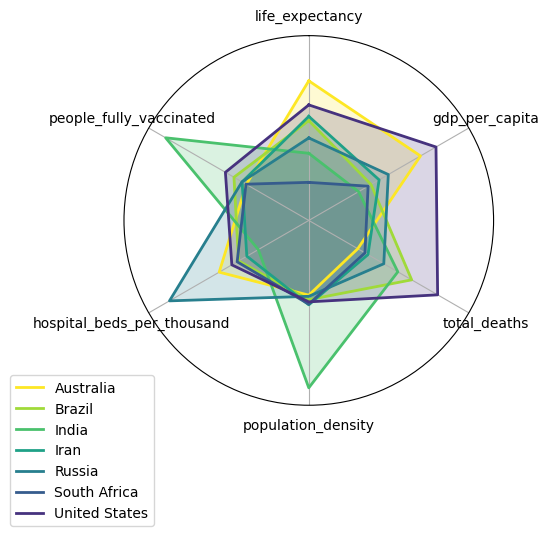

In [159]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from matplotlib.colors import ListedColormap

# Set data
df = continent_stats

# Number of variables
categories = list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (divide the plot by the number of variables)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(subplot_kw=dict(polar=True))

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30], ["10", "20", "30"], color="grey", size=7)
plt.ylim(-3, 3)

# Create a colormap for lines and fill areas
colors = plt.cm.viridis_r(df.index / len(df))
custom_cmap = ListedColormap(colors)

# Plot each continent
for i in range(len(df)):
    values = df.loc[i].drop('location').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df["location"][i], color=colors[i])
    ax.fill(angles, values, alpha=0.2, color=colors[i])

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()


In [161]:
data['year'] = pd.DatetimeIndex(data['date']).year
iranData = data[data['location'] == 'Iran']
iranData['date'] = pd.to_datetime(iranData['date'])
iranData = iranData.set_index('date', drop=True)
iranData

/tmp/ipykernel_47/2791620914.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,IRN,Asia,Iran,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.5,76.68,0.783,88550568.0,NaN,NaN,NaN,NaN,2020
2020-01-04,IRN,Asia,Iran,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.5,76.68,0.783,88550568.0,NaN,NaN,NaN,NaN,2020
2020-01-05,IRN,Asia,Iran,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.5,76.68,0.783,88550568.0,-531.5,-6.33,-6.33,-6.088886,2020
2020-01-06,IRN,Asia,Iran,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.5,76.68,0.783,88550568.0,NaN,NaN,NaN,NaN,2020
2020-01-07,IRN,Asia,Iran,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.5,76.68,0.783,88550568.0,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-14,IRN,Asia,Iran,7618727.0,0.0,139.286,146436.0,0.0,3.714,86038.149,...,NaN,1.5,76.68,0.783,88550568.0,NaN,NaN,NaN,NaN,2023
2023-10-15,IRN,Asia,Iran,7619981.0,1254.0,179.143,146480.0,44.0,6.286,86052.311,...,NaN,1.5,76.68,0.783,88550568.0,NaN,NaN,NaN,NaN,2023
2023-10-16,IRN,Asia,Iran,7619981.0,NaN,NaN,146480.0,NaN,NaN,86052.311,...,NaN,1.5,76.68,0.783,88550568.0,NaN,NaN,NaN,NaN,2023


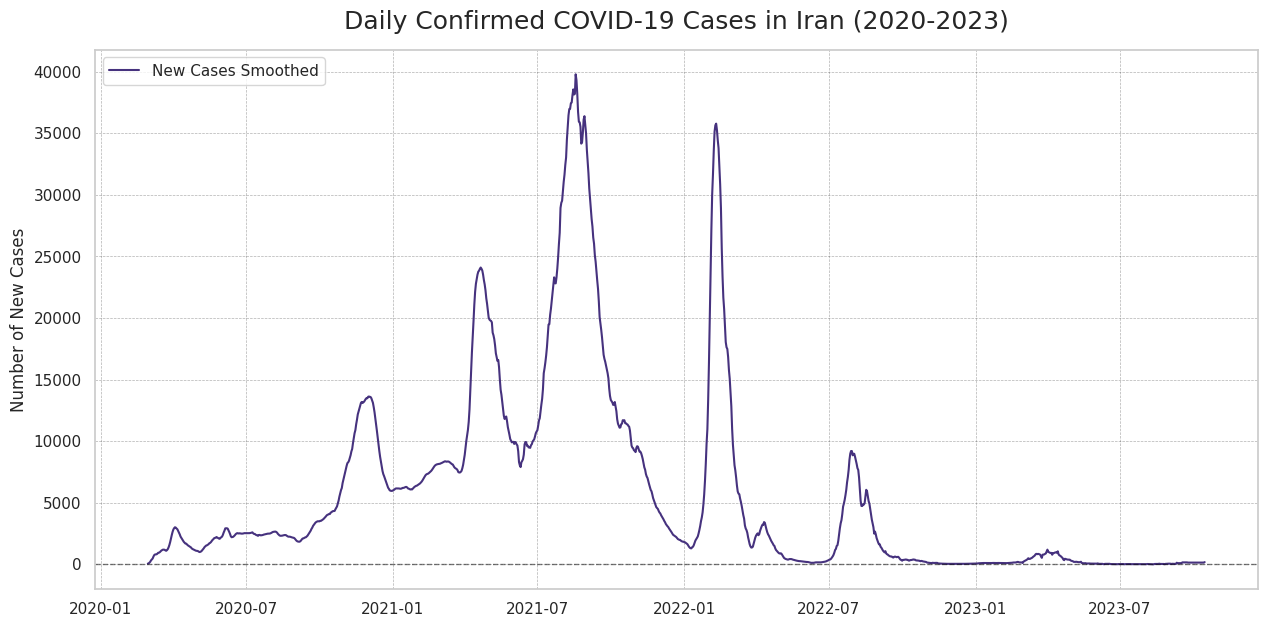

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming iranData is your DataFrame

plt.figure(figsize=(15, 7))
sns.set(style='whitegrid', palette='viridis')

ax = sns.lineplot(data=iranData['new_cases_smoothed']['2020-02-29':])

ax.set(xlabel="", ylabel="Number of New Cases")
ax.set_title("Daily Confirmed COVID-19 Cases in Iran (2020-2023)", fontsize=18, pad=15)
ax.legend(["New Cases Smoothed"], loc="upper left")

# Customize the grid lines
ax.grid(which='major', linestyle='--', linewidth='0.5', color='black', alpha=0.3)

# Add a horizontal line at y=0 for better reference
ax.axhline(0, color='black', linewidth=1, linestyle='--', alpha=0.5)

# Show the graph
plt.show()


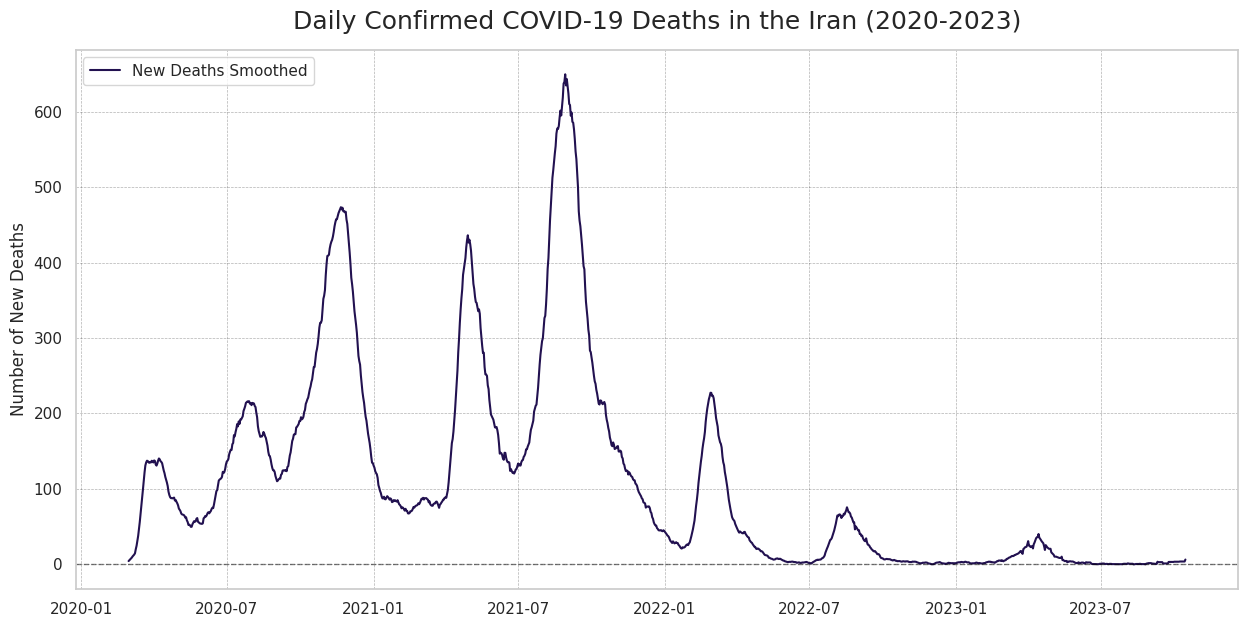

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming USData is your DataFrame

plt.figure(figsize=(15, 7))
sns.set(style='whitegrid', palette='magma')

ax = sns.lineplot(data=iranData['new_deaths_smoothed']['2020-02-29':])

ax.set(xlabel="", ylabel="Number of New Deaths")
ax.set_title("Daily Confirmed COVID-19 Deaths in the Iran (2020-2023)", fontsize=18, pad=15)
ax.legend(["New Deaths Smoothed"], loc="upper left")

# Customize the grid lines
ax.grid(which='major', linestyle='--', linewidth='0.5', color='black', alpha=0.3)

# Add a horizontal line at y=0 for better reference
ax.axhline(0, color='black', linewidth=1, linestyle='--', alpha=0.5)

# Show the graph
plt.show()

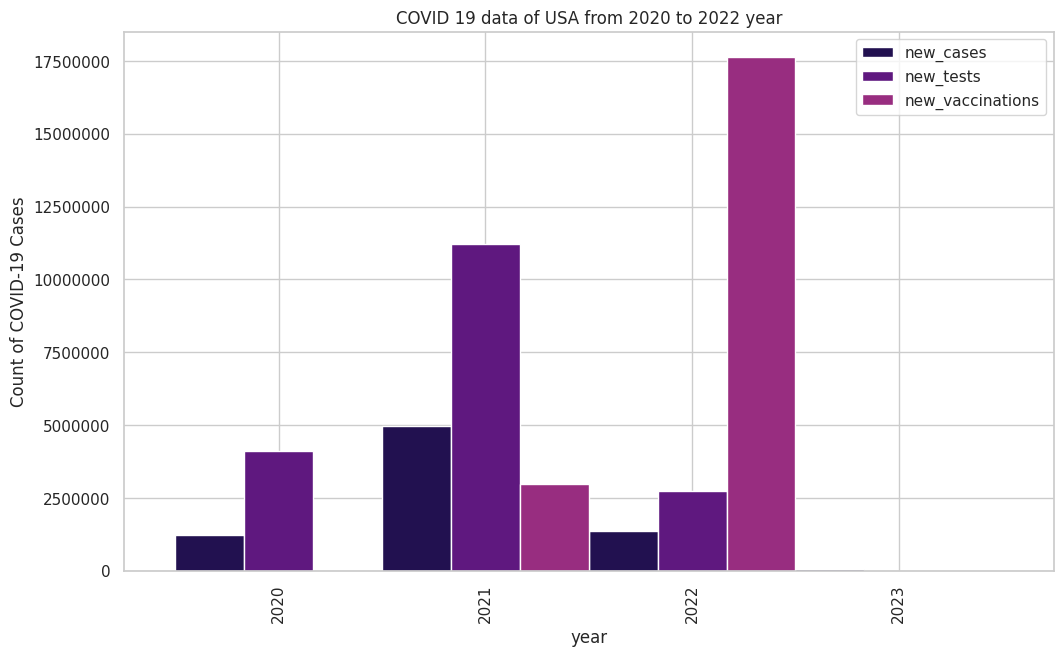

In [168]:
yearwise = data.groupby('location')
yearwise = list(yearwise)
iranData2 = iranData[["new_cases","new_tests","new_vaccinations","year"]]
year = iranData2.groupby('year').sum()
year.plot(figsize=(12,7),kind="bar",grid=True,xlabel="year",ylabel="Count of COVID-19 Cases",width=1, title="COVID 19 data of USA from 2020 to 2022 year")
plt.ticklabel_format(style='plain', axis='y')